In [17]:
import kagglehub
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# Téléchargement du dataset
dataset_path = kagglehub.dataset_download("erogluegemen/airline-passengers")

print(f"Dataset downloaded to: {dataset_path}")

Using Colab cache for faster access to the 'airline-passengers' dataset.
Dataset downloaded to: /kaggle/input/airline-passengers


In [19]:
df = pd.read_csv('/kaggle/input/airline-passengers/airline-passengers.csv')
display(df.head(n=5))

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
df.columns

Index(['month', 'total_passengers'], dtype='object')

In [21]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df = df.set_index('month', drop=True)
display(df.head())

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


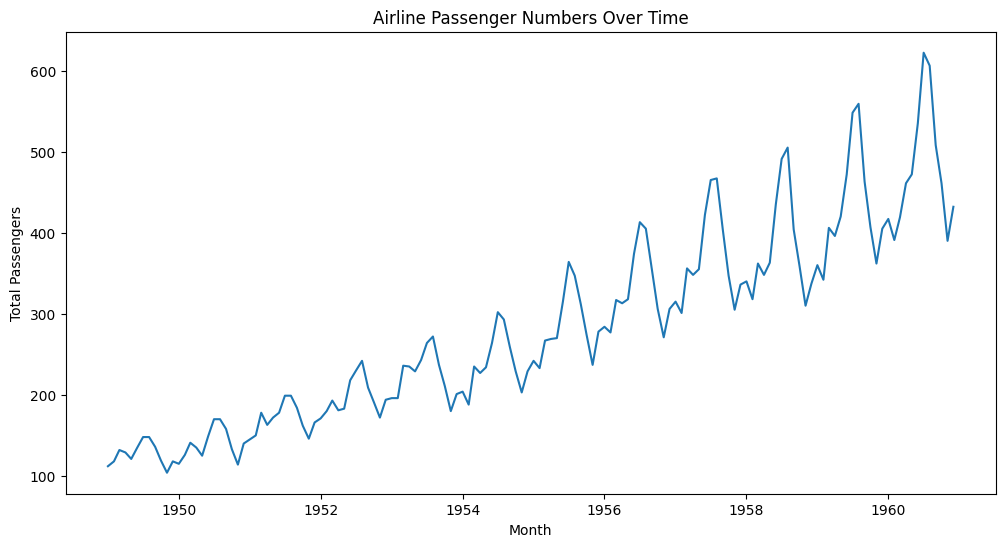

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title("Airline Passenger Numbers Over Time")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.show()

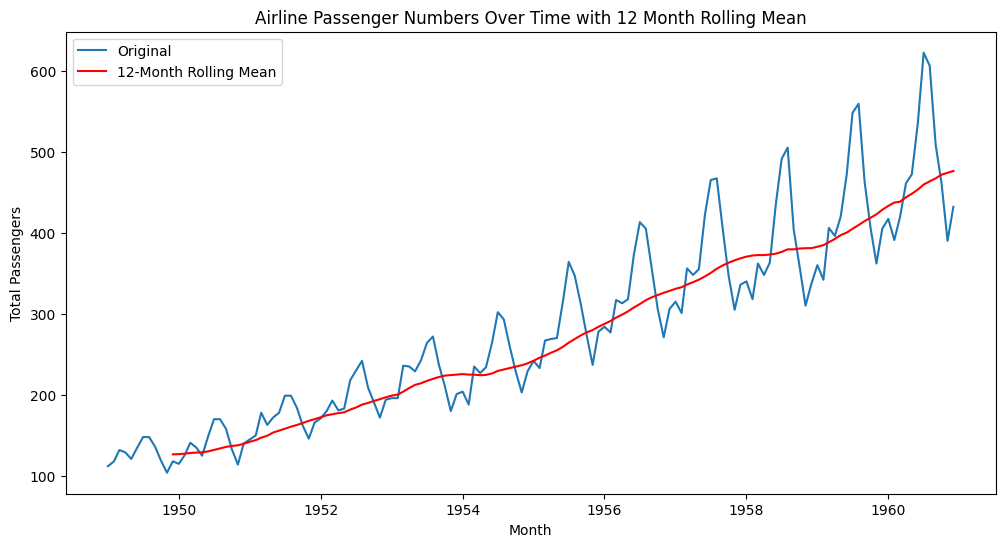

In [23]:
# Calcul de la moyenne avec une fenetre = 12
rolling_mean = df.rolling(window=12).mean()

# Tracer la série temporelle originale et la moyenne mobile
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Moyenne mobile sur 12 mois', color='red')
plt.title("Nombre de passagers des compagnies aériennes au fil du temps avec moyenne mobile sur 12 mois")
plt.xlabel("Mois")
plt.ylabel("Nombre total de passagers")
plt.legend()
plt.show()

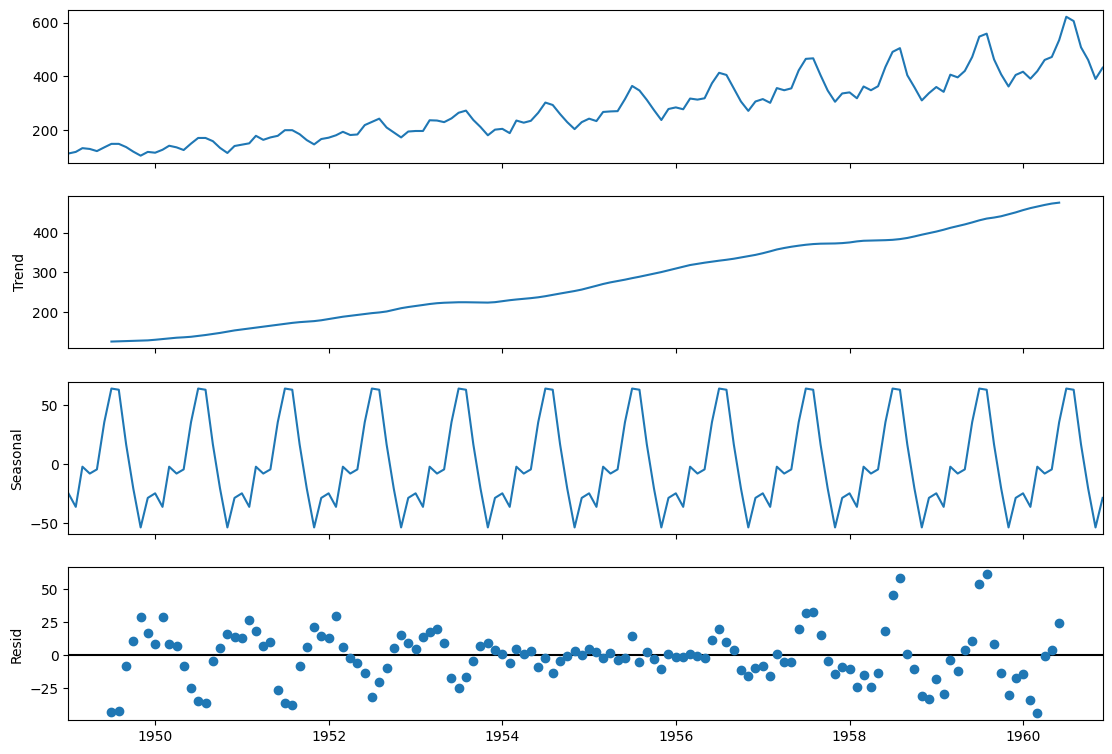

In [16]:
decomposition = seasonal_decompose(df, model='additive')

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()